<a href="https://colab.research.google.com/github/AnhMcConnell/Tensorflow-2-and-Keras-Deep-Learning-Bootcamp/blob/main/tensorflow_keras_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Goals
For this project, you will create a deep learning regression model that predicts the likelihood that a student applying to graduate school will be accepted based on various application factors (such as test scores).

By analyzing the parameters in this graduate admissions dataset, you will use TensorFlow with Keras to create a regression model that can evaluate the chances of an applicant being admitted. You hope this will give you further insight into the graduate admissions world and improve your test prep strategy.


Context
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

Content
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
4. Undergraduate GPA ( out of 10 )
5. Research Experience ( either 0 or 1 )
6. Chance of Admit ( ranging from 0 to 1 )
Acknowledgements
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya.

Inspiration
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

Citation
Please cite the following if you are interested in using the dataset :
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import files

In [6]:
uploaded = files.upload()

Saving regression-challenge.zip to regression-challenge.zip


In [7]:
!unzip regression-challenge.zip

Archive:  regression-challenge.zip
   creating: regression-challenge/
  inflating: regression-challenge/.DS_Store  
  inflating: __MACOSX/regression-challenge/._.DS_Store  
   creating: regression-challenge/regression-challenge-starter/
   creating: regression-challenge/regression-challenge-solution/
  inflating: regression-challenge/regression-challenge-starter/script.py  
  inflating: __MACOSX/regression-challenge/regression-challenge-starter/._script.py  
  inflating: regression-challenge/regression-challenge-starter/admissions_data.csv  
  inflating: __MACOSX/regression-challenge/regression-challenge-starter/._admissions_data.csv  
  inflating: regression-challenge/regression-challenge-solution/script.py  
  inflating: __MACOSX/regression-challenge/regression-challenge-solution/._script.py  
  inflating: regression-challenge/regression-challenge-solution/admissions_data.csv  
  inflating: __MACOSX/regression-challenge/regression-challenge-solution/._admissions_data.csv  


In [8]:
import os

In [9]:
data_dir = '/content/regression-challenge/regression-challenge-starter/admissions_data.csv'

In [10]:
data = pd.read_csv(data_dir)

In [6]:
data.head(2)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [11]:
# checking our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [12]:
# Nice! Dataset with all numerical features. Now, lets check again to make sure if we have any Nan values
data.isnull().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


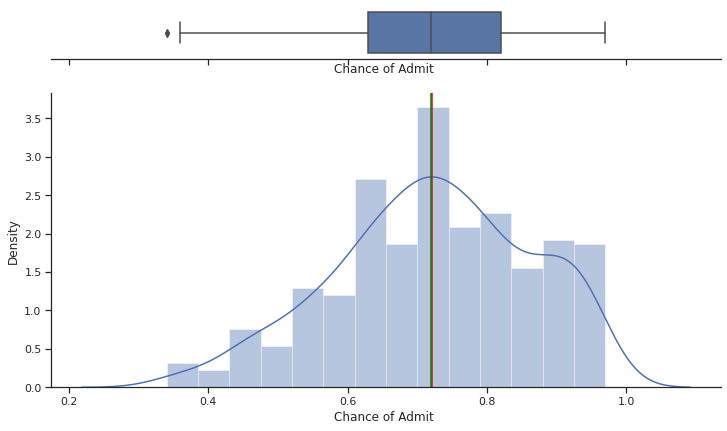

Skewness: -0.289966
Kurtosis: -0.454682


In [14]:
# Lets have a look on our prediction feature Chance of Admit 
sns.set(style="ticks")

x = data['Chance of Admit ']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12,7))

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
plt.axvline(x = x.mean(), c = 'red')
plt.axvline(x = x.median(), c = 'green')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.show()
print("Skewness: %f" % data['Chance of Admit '].skew())
print("Kurtosis: %f" % data['Chance of Admit '].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


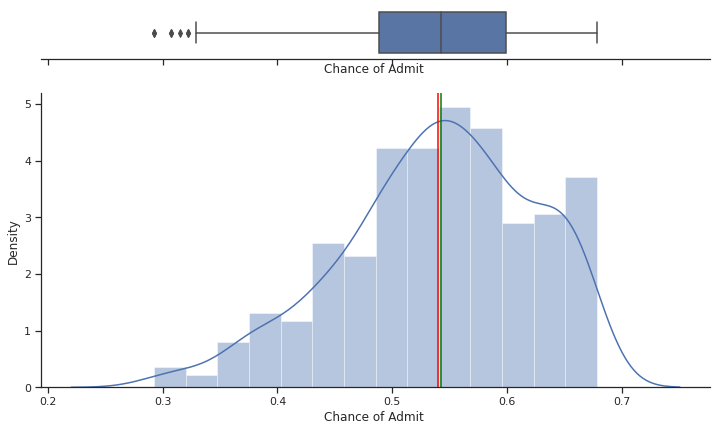

Skewness: -0.289966
Kurtosis: -0.454682


In [15]:
sns.set(style="ticks")

x = (np.log1p(data['Chance of Admit ']))
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(12,7))

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist)
plt.axvline(x = x.mean(), c = 'red')
plt.axvline(x = x.median(), c = 'green')

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.show()
print("Skewness: %f" % data['Chance of Admit '].skew())
print("Kurtosis: %f" % data['Chance of Admit '].kurt())

ok, the red line in our chart indicates the mean of the chance of Admit, green line indicates the median.
- By looking at this distribution chart, It's not presented as a nice distribution. This is a left skewed distribution or negative skew. That's because the tail is longer on the negative direction of the number line. The peak of histogram veers to the right.

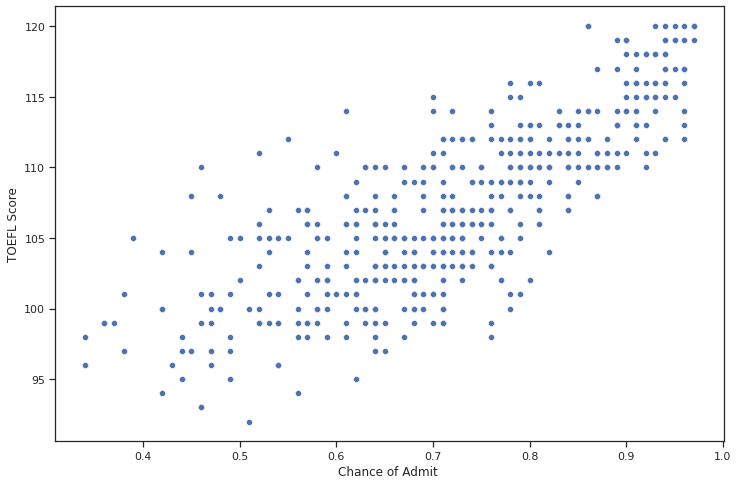

In [16]:
# 
plt.figure(figsize=(12,8))
sns.scatterplot(x='Chance of Admit ',y='TOEFL Score',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


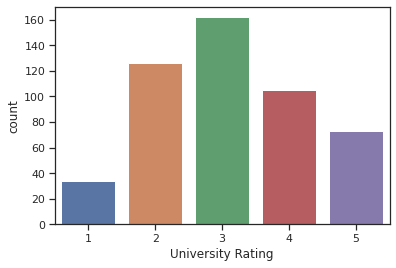

In [17]:

# Lets see University rating count
sns.countplot(data['University Rating'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


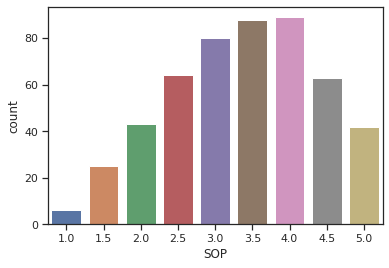

In [18]:
# Now, lets check feature SOP
sns.countplot(data['SOP'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


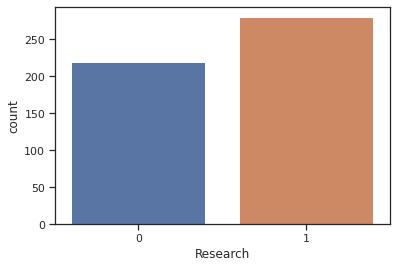

In [19]:
# Check out research experience
sns.countplot(data['Research'])

In [20]:
# the number of people has research experience is slightly lower than people has experience 
# Lets check the correlation between variables and Chance of Admit
data.corr()['Chance of Admit '].sort_values()

Serial No.           0.008505
Research             0.545871
LOR                  0.645365
SOP                  0.684137
University Rating    0.690132
TOEFL Score          0.792228
GRE Score            0.810351
CGPA                 0.882413
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

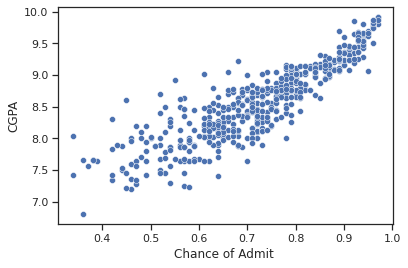

In [21]:
# CGPA seems has the most correlated with Chance of admit, lets take a look at this feature
sns.scatterplot(x='Chance of Admit ',y='CGPA',data=data)

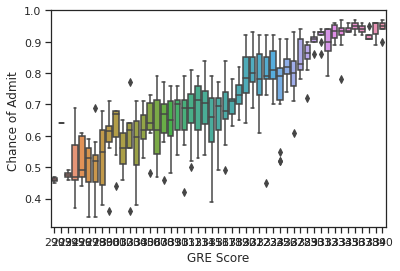

In [22]:
# Now, moving on to GRE score 
sns.boxplot(x='GRE Score', y='Chance of Admit ', data=data)

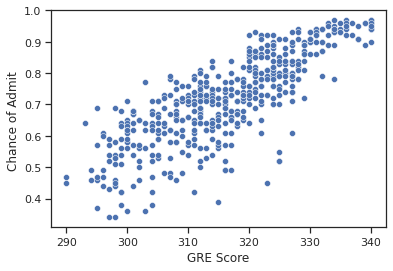

In [23]:
sns.scatterplot(x='GRE Score', y='Chance of Admit ', data=data)

In [24]:
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [25]:
# Drop Serial column as it does not bing any value to our prediction model
data.drop('Serial No.', axis=1, inplace=True)

In [26]:
data.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [27]:
# Split up our dataset into features and labels
features = data.drop('Chance of Admit ', axis=1)
labels = data['Chance of Admit ']

In [28]:
#labels
#help(train_test_split)

In [29]:
# Now, split our data to training features, test features, training labels, test labels
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)


In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
X_train = scaler.fit_transform(X_train)

In [33]:
X_test = scaler.transform(X_test)


In [34]:
X_train.shape

(375, 7)

In [35]:
X_test.shape

(125, 7)

**Creating a Model**

In [36]:
# Create model
model = Sequential()
# Add the shape of input
model.add(InputLayer(input_shape=(X_train.shape[1],)))
# Add hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))
# Compile model
model.compile(loss='mse', optimizer='adam')
# Train and fit mode


In [37]:
model.fit(x=X_train,y=y_train.values, validation_data=(X_test, y_test.values), epochs=200, batch_size=16)

Epoch 1/200
24/24 [==============================] - 1s 14ms/step - loss: 0.5160 - val_loss: 0.0206
Epoch 2/200
24/24 [==============================] - 0s 5ms/step - loss: 0.1213 - val_loss: 0.0235
Epoch 3/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0866 - val_loss: 0.0178
Epoch 4/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0617 - val_loss: 0.0046
Epoch 5/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0671 - val_loss: 0.0118
Epoch 6/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0539 - val_loss: 0.0061
Epoch 7/200
24/24 [==============================] - 0s 6ms/step - loss: 0.0521 - val_loss: 0.0052
Epoch 8/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0528 - val_loss: 0.0068
Epoch 9/200
24/24 [==============================] - 0s 4ms/step - loss: 0.0495 - val_loss: 0.0109
Epoch 10/200
24/24 [==============================] - 0s 5ms/step - loss: 0.0449 - val_loss: 0.0057
Epoch 11

In [38]:
losses = pd.DataFrame(model.history.history)

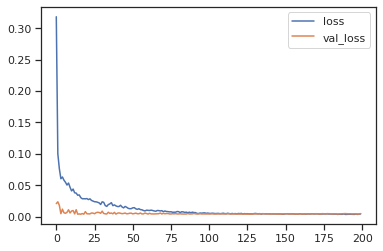

In [39]:
losses.plot()

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

# Predicting on Brand new data 

In [41]:
X_test

array([[ 0.87234043,  0.85714286,  0.75      ,  0.75      ,  0.57142857,
         0.87820513,  1.        ],
       [ 0.44680851,  0.57142857,  0.75      ,  0.875     ,  0.71428571,
         0.71794872,  1.        ],
       [ 0.46808511,  0.46428571,  0.25      ,  0.25      ,  0.28571429,
         0.2724359 ,  0.        ],
       [ 0.40425532,  0.60714286,  0.5       ,  0.5       ,  0.42857143,
         0.60576923,  0.        ],
       [ 0.70212766,  0.71428571,  0.5       ,  0.625     ,  0.42857143,
         0.72115385,  1.        ],
       [ 0.76595745,  0.67857143,  0.75      ,  0.875     ,  0.71428571,
         0.77884615,  1.        ],
       [-0.06382979,  0.28571429,  0.        ,  0.125     ,  0.14285714,
         0.24358974,  0.        ],
       [ 0.17021277,  0.5       ,  0.75      ,  0.375     ,  0.42857143,
         0.53525641,  0.        ],
       [ 0.53191489,  0.60714286,  0.5       ,  0.625     ,  0.71428571,
         0.77564103,  1.        ],
       [ 0.57446809,  0.7142

In [42]:
preds = model.predict(X_test)

In [43]:
mean_absolute_error(y_test, preds)

0.054224493427276615

In [44]:
explained_variance_score(y_test, preds)

0.7586742051187428

In [45]:
data['Chance of Admit '].mean()

0.7217399999999996

In [46]:
data['Chance of Admit '].median()

0.72

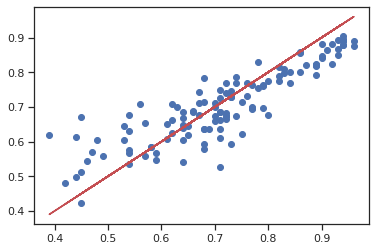

In [47]:
# Our Prediction
plt.scatter(y_test, preds)

plt.plot(y_test, y_test, 'r')

In [48]:
errors = y_test.values.reshape(125, 1) - preds

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


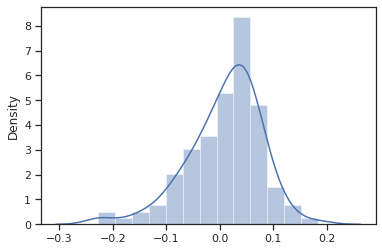

In [49]:
sns.distplot(errors)

In [51]:
rmse = mean_squared_error(y_test, preds, squared=False)

In [52]:
rmse

0.06921589212871604

# Predicting a single value


In [57]:
single_value = data.drop('Chance of Admit ',axis=1).iloc[0]

In [59]:
single_value = scaler.transform(single_value.values.reshape(-1, 7))

In [60]:
single_value

array([[0.93617021, 0.92857143, 0.75      , 0.875     , 0.85714286,
        0.91346154, 1.        ]])

In [61]:
model.predict(single_value)

array([[0.8818678]], dtype=float32)

In [62]:
data.iloc[0]

GRE Score            337.00
TOEFL Score          118.00
University Rating      4.00
SOP                    4.50
LOR                    4.50
CGPA                   9.65
Research               1.00
Chance of Admit        0.92
Name: 0, dtype: float64

In [63]:
second_value = data.drop('Chance of Admit ',axis=1).iloc[1]

In [64]:
second_value = scaler.transform(second_value.values.reshape(-1, 7))

In [65]:
second_value

array([[0.65957447, 0.53571429, 0.75      , 0.75      , 0.85714286,
        0.66346154, 1.        ]])

In [66]:
model.predict(second_value)

array([[0.7762339]], dtype=float32)

In [67]:
data.iloc[1]

GRE Score            324.00
TOEFL Score          107.00
University Rating      4.00
SOP                    4.00
LOR                    4.50
CGPA                   8.87
Research               1.00
Chance of Admit        0.76
Name: 1, dtype: float64

In [68]:
from tensorflow.keras.models import load_model

In [69]:
model.save('model_regression.h5')